In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import fdf_to_wkt
import pathlib
import shapely
from shapely.geometry import GeometryCollection, Point
from shapely.wkt import loads

In [3]:
file_path = pathlib.Path.home() / "Desktop" / "FramesMarkup.fdf"
file_path.exists()

True

In [4]:
annots = fdf_to_wkt.load_annotations(file_path)

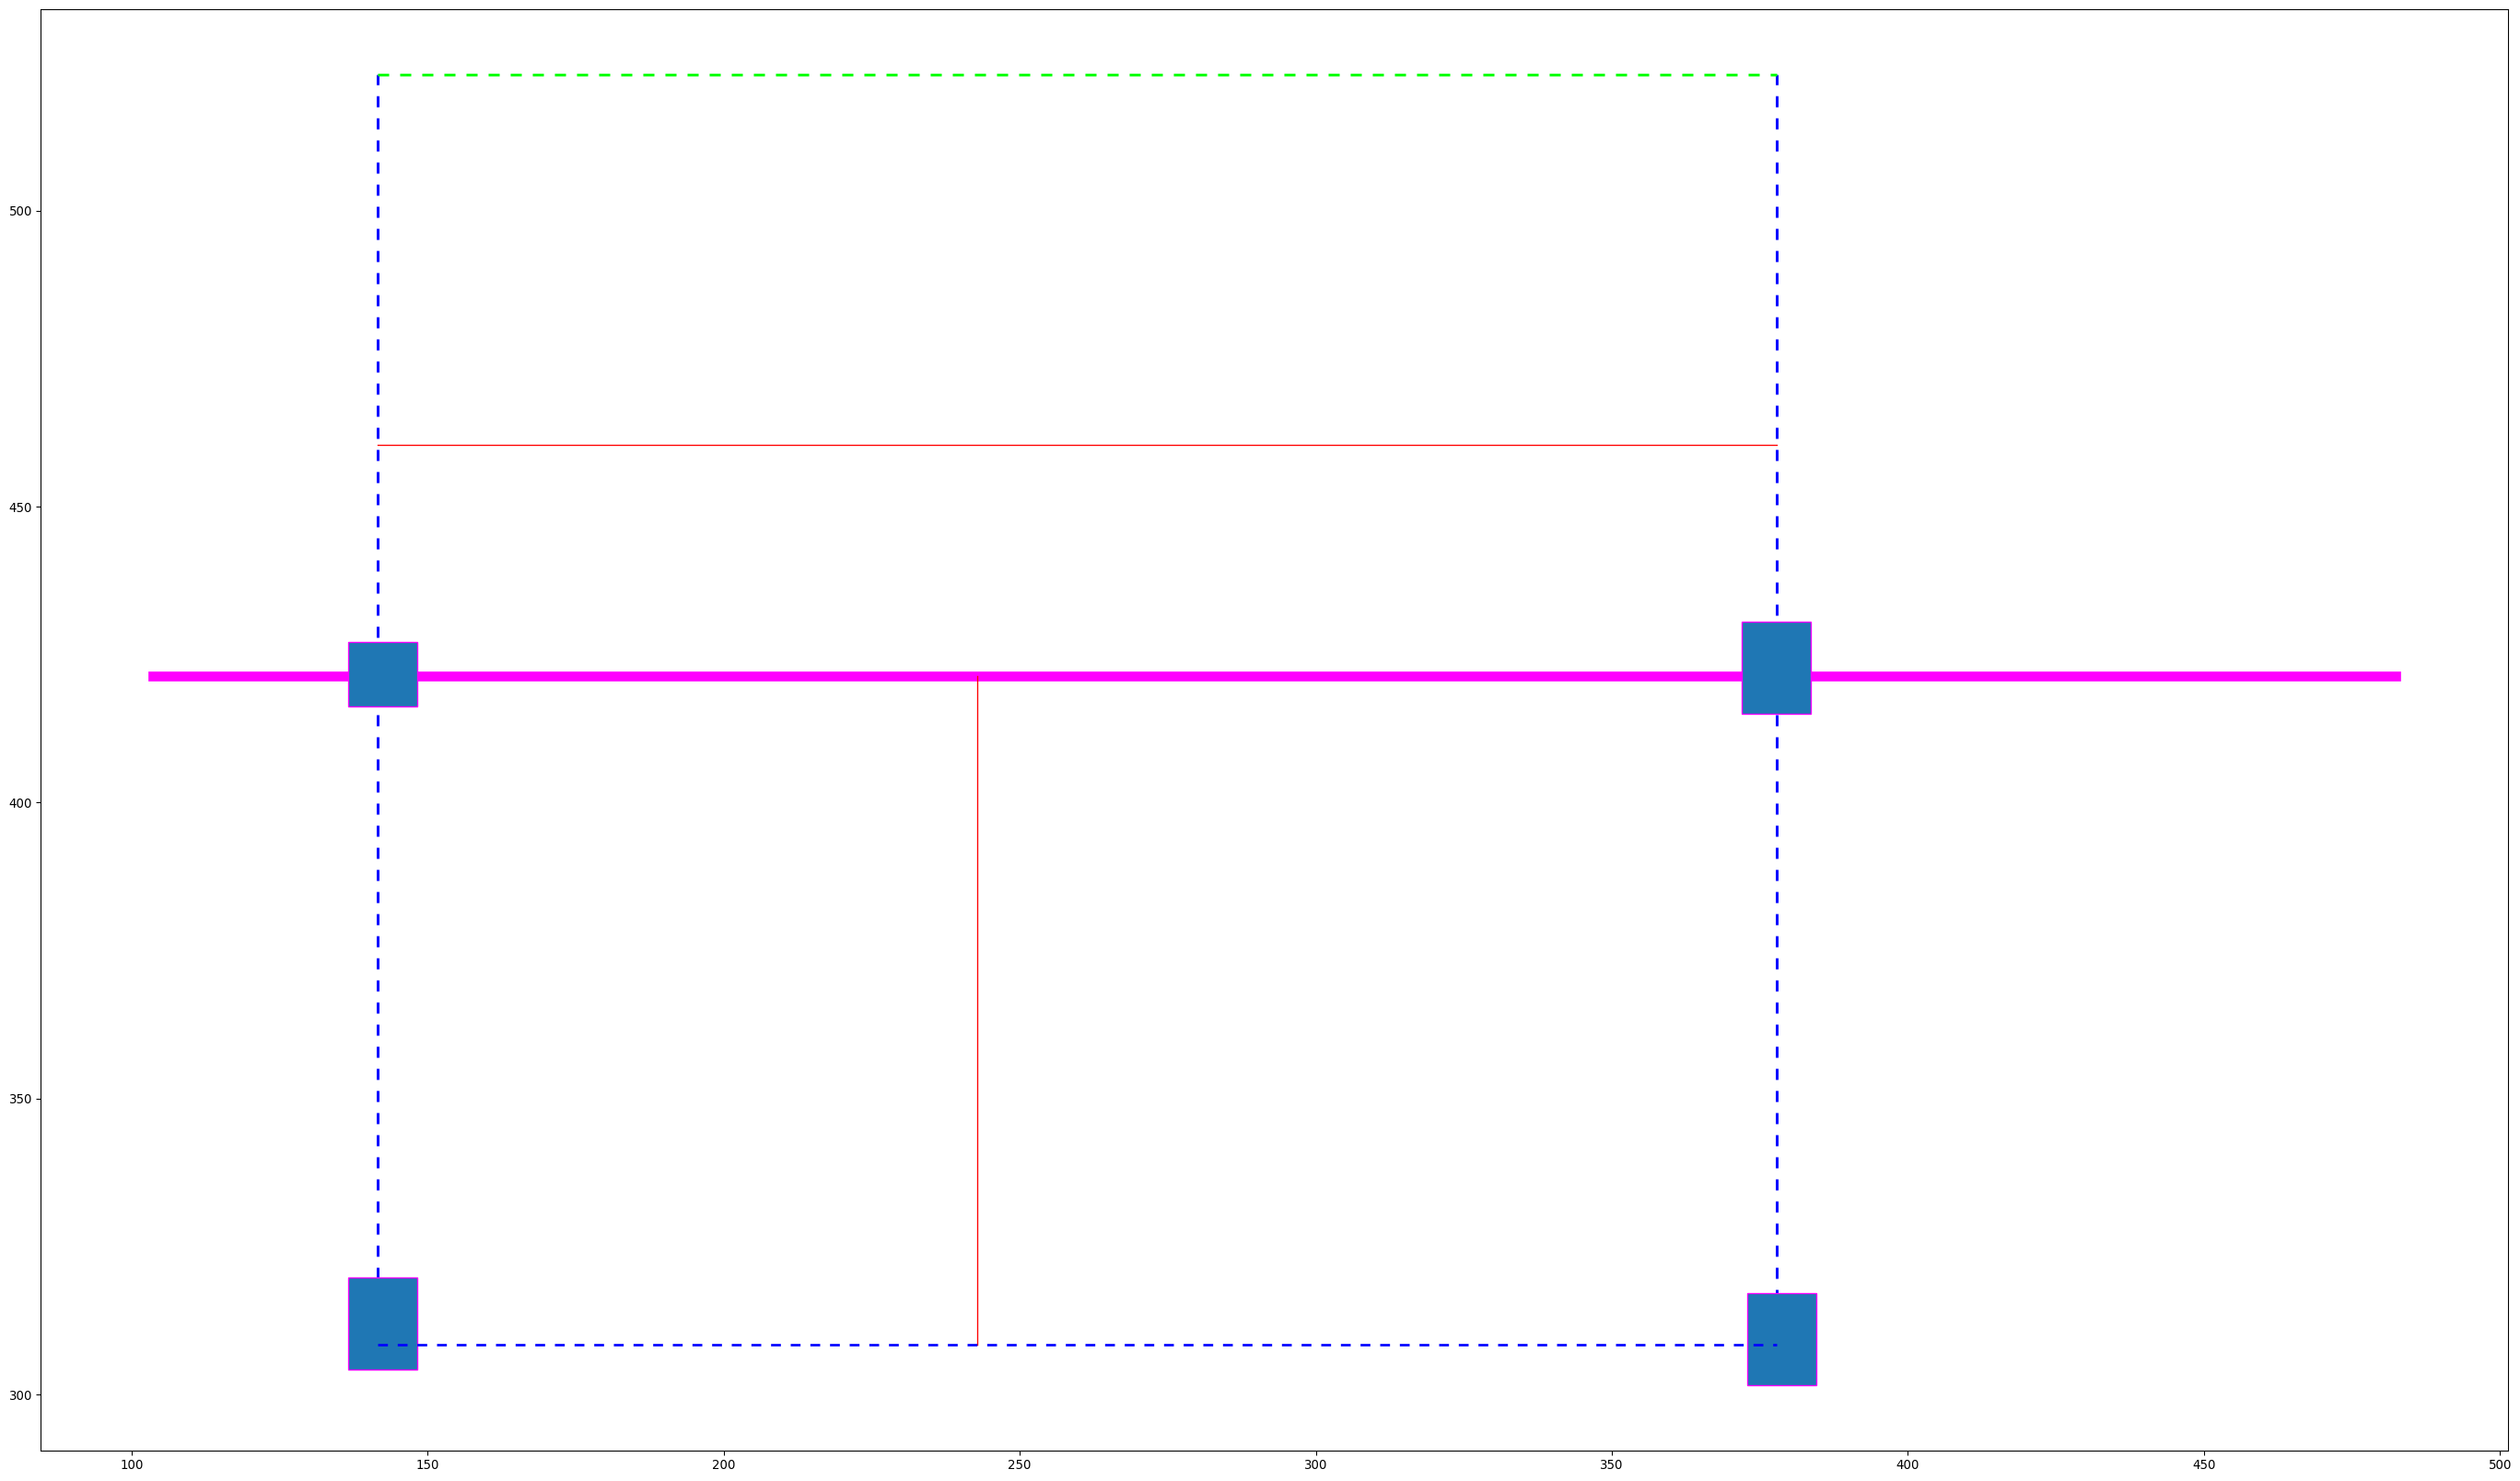

In [17]:
fdf_to_wkt.plot_annotations(annots, size=36, dpi=96)

In [6]:
color_order = {
    (1, 0, 0): 0,
    (0, 1, 0): 1,
    (0, 0, 1): 2,
    (1, 0, 1): 3,
    (0, 0, 0): 4,
}
line_sorts = sorted(annots, key=lambda x: color_order[x.properties.line_color])

In [7]:
joists = [annot for annot in annots if annot.properties.line_color == (1, 0, 0)]
beams1 = [annot for annot in annots if annot.properties.line_color == (0, 1, 0)]
beams2 = [annot for annot in annots if annot.properties.line_color == (0, 0, 1)]
supports = [annot for annot in annots if annot.properties.line_color == (1, 0, 1)]

In [8]:
for beam1 in beams1:
    for beam2 in beams2:
        if beam1.geom.intersects(beam2.geom):
            print("Intersections: ", beam1.label, beam2.label)
            beams1

Intersections:  B1 B2
Intersections:  B1 B3


In [9]:
for beam in joists:
    for vertex in list(beam.geom.coords):
        point = Point(vertex)
        for support in supports + beams1 + beams2:
            if beam.geom.intersects(support.geom) and point.intersects(support.geom):
                print("Transfers Reaction: ", beam.label, "->", support.label, "@", point)

Transfers Reaction:  J1 -> B2 @ POINT (141.5338 460.4205)
Transfers Reaction:  J1 -> B3 @ POINT (377.9203 460.4205)
Transfers Reaction:  J2 -> B4 @ POINT (242.8252 308.3985)
Transfers Reaction:  J2 -> W1 @ POINT (242.8252 421.3477)
